In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, max_error, r2_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import scipy.stats as stats

## SENTINEL-2 BATHYMETRY ANALYSIS

# NUORGAM

In [2]:
# import NUORGAM (n) SENTINEL-2 (s2) CALIBRATION POINTS (c)
n_s2_c = pd.read_csv('../data/output/satellite-analysis/nuorgam_s2_rastersample_50calibpoints.csv', delimiter=',')

In [3]:
n_s2_c

,PointNo,Northing,Easting,Elevation,Latitude,Longitude,Height,Horizontal,VerticalSt,PDOP,...,SAMPLE_14,SAMPLE_15,SAMPLE_16,SAMPLE_17,SAMPLE_18,SAMPLE_19,SAMPLE_20,SAMPLE_21,SAMPLE_22,SAMPLE_23
0,nuorgamchool1,7775288.735,532936.157,13.576,70.082332,27.866296,36.386226,0.005,0.012,1.3,...,0.115,0.0006,0.0095,0.0097,0.0074,0.0000,0,0,0,0
1,nuorgamchool3,7775292.913,532940.301,13.258,70.082369,27.866406,36.068643,0.005,0.011,1.3,...,0.115,0.0007,0.0088,0.0084,0.0059,0.0001,0,0,0,0
2,nuorgamchool5,7775297.442,532950.578,13.394,70.082408,27.866678,36.204099,0.005,0.011,1.3,...,0.115,0.0007,0.0061,0.0067,0.0048,0.0001,0,0,0,0
3,nuorgamchool6,7775293.908,532958.277,14.079,70.082376,27.866879,36.888788,0.006,0.013,1.3,...,0.115,0.0007,0.0061,0.0067,0.0048,0.0001,0,0,0,0
4,nuorgamchool8,7775300.924,532958.913,12.817,70.082438,27.866899,35.626058,0.005,0.011,1.3,...,0.115,0.0005,0.0052,0.0046,0.0034,0.0000,0,0,0,0
5,nuorgamchool10,7775299.774,532948.591,13.026,70.082429,27.866627,35.835527,0.005,0.011,1.3,...,0.115,0.0007,0.0088,0.0084,0.0059,0.0001,0,0,0,0
6,nuorgamchool12,7775296.990,532942.107,13.022,70.082405,27.866455,35.832042,0.005,0.011,1.3,...,0.115,0.0007,0.0088,0.0084,0.0059,0.0001,0,0,0,0
7,nuorgamchool16,7775301.048,532932.769,12.697,70.082443,27.866211,35.507415,0.006,0.012,1.2,...,0.115,0.0006,0.0035,0.0033,0.0025,0.0000,0,0,0,0
8,nuorgamchool18,7775298.075,532927.587,12.819,70.082417,27.866074,35.629620,0.006,0.012,1.2,...,0.115,0.0006,0.0044,0.0040,0.0030,0.0000,0,0,0,0
9,nuorgamchool21,7775281.244,532924.162,13.901,70.082266,27.865977,36.712001,0.006,0.012,1.2,...,0.115,0.0006,0.0060,0.0055,0.0038,0.0000,0,0,0,0


In [4]:
# drop columns
n_s2_c = n_s2_c.drop(columns=
                           ['PDOP', 'HDOP', 'VDOP','NumberOfPo', 'NumberOfSa', 'Day', 
                            'TSC3Time', 'TSC3UTC', 'StartGPSwe',
                            'StartGPSse', 'EndGPSweek', 'EndGPSseco','SAMPLE_1',
                            'SAMPLE_5','SAMPLE_6','SAMPLE_7','SAMPLE_9', 'SAMPLE_10',
                            'SAMPLE_12','SAMPLE_13', 'SAMPLE_14', 'SAMPLE_15',
                            'SAMPLE_16', 'SAMPLE_17','SAMPLE_18', 'SAMPLE_19', 
                            'SAMPLE_20','SAMPLE_21', 'SAMPLE_22','SAMPLE_23'])

In [5]:
n_s2_c.columns

Index(['PointNo', 'Northing', 'Easting', 'Elevation', 'Latitude', 'Longitude',
       'Height', 'Horizontal', 'VerticalSt', 'SAMPLE_2', 'SAMPLE_3',
       'SAMPLE_4', 'SAMPLE_8', 'SAMPLE_11'],
      dtype='object')

In [6]:
n_s2_c

,PointNo,Northing,Easting,Elevation,Latitude,Longitude,Height,Horizontal,VerticalSt,SAMPLE_2,SAMPLE_3,SAMPLE_4,SAMPLE_8,SAMPLE_11
0,nuorgamchool1,7775288.735,532936.157,13.576,70.082332,27.866296,36.386226,0.005,0.012,0.1680,0.1959,0.1942,0.2974,0.2220
1,nuorgamchool3,7775292.913,532940.301,13.258,70.082369,27.866406,36.068643,0.005,0.011,0.1574,0.1821,0.1860,0.2576,0.2559
2,nuorgamchool5,7775297.442,532950.578,13.394,70.082408,27.866678,36.204099,0.005,0.011,0.1472,0.1653,0.1600,0.2762,0.2559
3,nuorgamchool6,7775293.908,532958.277,14.079,70.082376,27.866879,36.888788,0.006,0.013,0.1472,0.1653,0.1600,0.2762,0.2559
4,nuorgamchool8,7775300.924,532958.913,12.817,70.082438,27.866899,35.626058,0.005,0.011,0.1323,0.1444,0.1505,0.1664,0.1572
5,nuorgamchool10,7775299.774,532948.591,13.026,70.082429,27.866627,35.835527,0.005,0.011,0.1574,0.1821,0.1860,0.2576,0.2559
6,nuorgamchool12,7775296.990,532942.107,13.022,70.082405,27.866455,35.832042,0.005,0.011,0.1574,0.1821,0.1860,0.2576,0.2559
7,nuorgamchool16,7775301.048,532932.769,12.697,70.082443,27.866211,35.507415,0.006,0.012,0.1248,0.1310,0.1340,0.1335,0.1388
8,nuorgamchool18,7775298.075,532927.587,12.819,70.082417,27.866074,35.629620,0.006,0.012,0.1288,0.1392,0.1440,0.1608,0.2220
9,nuorgamchool21,7775281.244,532924.162,13.901,70.082266,27.865977,36.712001,0.006,0.012,0.1375,0.1540,0.1590,0.2628,0.2220


In [7]:
# rename columns
# Band 2 - Blue
# Band 3 - Green
# Band 4 - Red
# Band 8 - NIR
# Band 11 - SWIR
n_s2_c = n_s2_c.rename(columns={"SAMPLE_2": "Band_2", "SAMPLE_3": "Band_3", "SAMPLE_4": "Band_4", "SAMPLE_8": "Band_8", "SAMPLE_11": "Band_11"})

In [8]:
n_s2_c

,PointNo,Northing,Easting,Elevation,Latitude,Longitude,Height,Horizontal,VerticalSt,Band_2,Band_3,Band_4,Band_8,Band_11
0,nuorgamchool1,7775288.735,532936.157,13.576,70.082332,27.866296,36.386226,0.005,0.012,0.1680,0.1959,0.1942,0.2974,0.2220
1,nuorgamchool3,7775292.913,532940.301,13.258,70.082369,27.866406,36.068643,0.005,0.011,0.1574,0.1821,0.1860,0.2576,0.2559
2,nuorgamchool5,7775297.442,532950.578,13.394,70.082408,27.866678,36.204099,0.005,0.011,0.1472,0.1653,0.1600,0.2762,0.2559
3,nuorgamchool6,7775293.908,532958.277,14.079,70.082376,27.866879,36.888788,0.006,0.013,0.1472,0.1653,0.1600,0.2762,0.2559
4,nuorgamchool8,7775300.924,532958.913,12.817,70.082438,27.866899,35.626058,0.005,0.011,0.1323,0.1444,0.1505,0.1664,0.1572
5,nuorgamchool10,7775299.774,532948.591,13.026,70.082429,27.866627,35.835527,0.005,0.011,0.1574,0.1821,0.1860,0.2576,0.2559
6,nuorgamchool12,7775296.990,532942.107,13.022,70.082405,27.866455,35.832042,0.005,0.011,0.1574,0.1821,0.1860,0.2576,0.2559
7,nuorgamchool16,7775301.048,532932.769,12.697,70.082443,27.866211,35.507415,0.006,0.012,0.1248,0.1310,0.1340,0.1335,0.1388
8,nuorgamchool18,7775298.075,532927.587,12.819,70.082417,27.866074,35.629620,0.006,0.012,0.1288,0.1392,0.1440,0.1608,0.2220
9,nuorgamchool21,7775281.244,532924.162,13.901,70.082266,27.865977,36.712001,0.006,0.012,0.1375,0.1540,0.1590,0.2628,0.2220


In [9]:
# import NUORGAM (n) SENTINEL-2 (s2) VALIDATION POINTS (v)
n_s2_v = pd.read_csv('../data/output/satellite-analysis/nuorgam_s2_rastersample_50validpoints.csv', delimiter=',')

In [10]:
# drop columns
n_s2_v = n_s2_v.drop(columns=
                           ['PDOP', 'HDOP', 'VDOP','NumberOfPo', 'NumberOfSa', 'Day', 
                            'TSC3Time', 'TSC3UTC', 'StartGPSwe',
                            'StartGPSse', 'EndGPSweek', 'EndGPSseco','SAMPLE_1',
                            'SAMPLE_5','SAMPLE_6','SAMPLE_7','SAMPLE_9', 'SAMPLE_10',
                            'SAMPLE_12','SAMPLE_13', 'SAMPLE_14', 'SAMPLE_15',
                            'SAMPLE_16', 'SAMPLE_17','SAMPLE_18', 'SAMPLE_19', 
                            'SAMPLE_20','SAMPLE_21', 'SAMPLE_22','SAMPLE_23'])

In [11]:
# rename columns
# Band 2 - Blue
# Band 3 - Green
# Band 4 - Red
# Band 8 - NIR
# Band 11 - SWIR
n_s2_v = n_s2_v.rename(columns={"SAMPLE_2": "Band_2", "SAMPLE_3": "Band_3", "SAMPLE_4": "Band_4", "SAMPLE_8": "Band_8", "SAMPLE_11": "Band_11"})

In [12]:
n_s2_v

,PointNo,Northing,Easting,Elevation,Latitude,Longitude,Height,Horizontal,VerticalSt,Band_2,Band_3,Band_4,Band_8,Band_11
0,nuorgamchool2,7775288.560,532940.543,14.183,70.082330,27.866411,36.993443,0.006,0.012,0.1817,0.2050,0.2148,0.3240,0.2559
1,nuorgamchool4,7775294.915,532947.208,13.582,70.082386,27.866589,36.391510,0.005,0.011,0.1574,0.1821,0.1860,0.2576,0.2559
2,nuorgamchool7,7775298.293,532960.619,13.262,70.082415,27.866943,36.070897,0.005,0.011,0.1360,0.1508,0.1399,0.3018,0.2576
3,nuorgamchool9,7775300.432,532954.109,12.787,70.082435,27.866772,35.597051,0.005,0.011,0.1323,0.1444,0.1505,0.1664,0.1572
4,nuorgamchool11,7775300.758,532944.312,12.662,70.082439,27.866515,35.471997,0.005,0.011,0.1294,0.1382,0.1428,0.1513,0.1572
5,nuorgamchool13,7775298.443,532940.226,12.478,70.082419,27.866406,35.288114,0.005,0.011,0.1574,0.1821,0.1860,0.2576,0.2559
6,nuorgamchool14,7775294.444,532937.459,12.923,70.082383,27.866332,35.733090,0.005,0.011,0.1536,0.1673,0.1780,0.2130,0.2220
7,nuorgamchool15,7775294.749,532932.643,13.020,70.082386,27.866206,35.830915,0.005,0.011,0.1536,0.1673,0.1780,0.2130,0.2220
8,nuorgamchool17,7775301.575,532933.338,12.357,70.082448,27.866226,35.167106,0.006,0.012,0.1248,0.1310,0.1340,0.1335,0.1388
9,nuorgamchool19,7775291.658,532925.799,12.924,70.082360,27.866024,35.734533,0.006,0.012,0.1288,0.1392,0.1440,0.1608,0.2220


In [13]:
model = LinearRegression()

In [14]:
# 
x = n_s2_c[['Elevation']]
y = n_s2_c[['Band_3']]

In [15]:
model.fit(x, y)

r2_score = model.score(x, y)
print(f"R-squared value: {r2_score}")

R-squared value: 0.46266215295384416


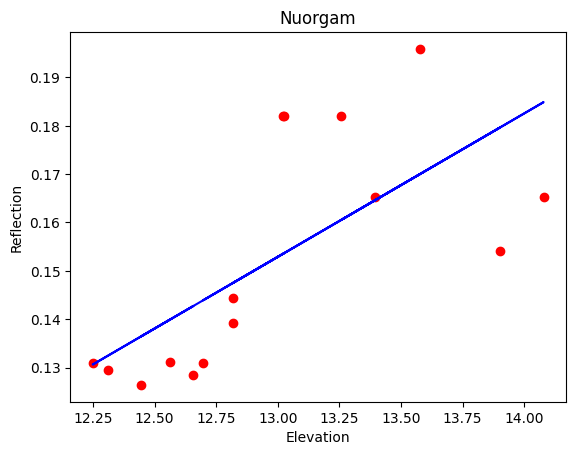

In [16]:
plt.scatter(x, y, color = 'red')
plt.plot(x, model.predict(x), color = 'blue')
plt.title('Nuorgam')
plt.xlabel('Elevation')
plt.ylabel('Reflection')
plt.show()

In [17]:
# 
x = n_s2_v[['Elevation']]
y = n_s2_v[['Band_3']]

In [18]:
model.fit(x, y)

r2_score = model.score(x, y)
print(f"R-squared value: {r2_score}")

R-squared value: 0.5956807856538455


In [20]:
n_s2_v['l_depth'] = 0.5956807856538455 * ((n_s2_v['Band_3']*100) ** 0.46266215295384416) 

In [21]:
n_s2_v

,PointNo,Northing,Easting,Elevation,Latitude,Longitude,Height,Horizontal,VerticalSt,Band_2,Band_3,Band_4,Band_8,Band_11,l_depth
0,nuorgamchool2,7775288.560,532940.543,14.183,70.082330,27.866411,36.993443,0.006,0.012,0.1817,0.2050,0.2148,0.3240,0.2559,2.409420
1,nuorgamchool4,7775294.915,532947.208,13.582,70.082386,27.866589,36.391510,0.005,0.011,0.1574,0.1821,0.1860,0.2576,0.2559,2.280927
2,nuorgamchool7,7775298.293,532960.619,13.262,70.082415,27.866943,36.070897,0.005,0.011,0.1360,0.1508,0.1399,0.3018,0.2576,2.090332
3,nuorgamchool9,7775300.432,532954.109,12.787,70.082435,27.866772,35.597051,0.005,0.011,0.1323,0.1444,0.1505,0.1664,0.1572,2.048809
4,nuorgamchool11,7775300.758,532944.312,12.662,70.082439,27.866515,35.471997,0.005,0.011,0.1294,0.1382,0.1428,0.1513,0.1572,2.007629
5,nuorgamchool13,7775298.443,532940.226,12.478,70.082419,27.866406,35.288114,0.005,0.011,0.1574,0.1821,0.1860,0.2576,0.2559,2.280927
6,nuorgamchool14,7775294.444,532937.459,12.923,70.082383,27.866332,35.733090,0.005,0.011,0.1536,0.1673,0.1780,0.2130,0.2220,2.193203
7,nuorgamchool15,7775294.749,532932.643,13.020,70.082386,27.866206,35.830915,0.005,0.011,0.1536,0.1673,0.1780,0.2130,0.2220,2.193203
8,nuorgamchool17,7775301.575,532933.338,12.357,70.082448,27.866226,35.167106,0.006,0.012,0.1248,0.1310,0.1340,0.1335,0.1388,1.958541
9,nuorgamchool19,7775291.658,532925.799,12.924,70.082360,27.866024,35.734533,0.006,0.012,0.1288,0.1392,0.1440,0.1608,0.2220,2.014337


# Lyzenga's model (78)

In [19]:
power = pow(n_s2_c['Band_3'],0.46266215295384416)

In [20]:
n_s2_c['l_depth'] = 0.5956807856538455 * power

In [21]:
n_s2_c

,PointNo,Northing,Easting,Elevation,Latitude,Longitude,Height,Horizontal,VerticalSt,Band_2,Band_3,Band_4,Band_8,Band_11,l_depth
0,nuorgamchool1,7775288.735,532936.157,13.576,70.082332,27.866296,36.386226,0.005,0.012,0.1680,0.1959,0.1942,0.2974,0.2220,0.280198
1,nuorgamchool3,7775292.913,532940.301,13.258,70.082369,27.866406,36.068643,0.005,0.011,0.1574,0.1821,0.1860,0.2576,0.2559,0.270886
2,nuorgamchool5,7775297.442,532950.578,13.394,70.082408,27.866678,36.204099,0.005,0.011,0.1472,0.1653,0.1600,0.2762,0.2559,0.259023
3,nuorgamchool6,7775293.908,532958.277,14.079,70.082376,27.866879,36.888788,0.006,0.013,0.1472,0.1653,0.1600,0.2762,0.2559,0.259023
4,nuorgamchool8,7775300.924,532958.913,12.817,70.082438,27.866899,35.626058,0.005,0.011,0.1323,0.1444,0.1505,0.1664,0.1572,0.243320
5,nuorgamchool10,7775299.774,532948.591,13.026,70.082429,27.866627,35.835527,0.005,0.011,0.1574,0.1821,0.1860,0.2576,0.2559,0.270886
6,nuorgamchool12,7775296.990,532942.107,13.022,70.082405,27.866455,35.832042,0.005,0.011,0.1574,0.1821,0.1860,0.2576,0.2559,0.270886
7,nuorgamchool16,7775301.048,532932.769,12.697,70.082443,27.866211,35.507415,0.006,0.012,0.1248,0.1310,0.1340,0.1335,0.1388,0.232599
8,nuorgamchool18,7775298.075,532927.587,12.819,70.082417,27.866074,35.629620,0.006,0.012,0.1288,0.1392,0.1440,0.1608,0.2220,0.239226
9,nuorgamchool21,7775281.244,532924.162,13.901,70.082266,27.865977,36.712001,0.006,0.012,0.1375,0.1540,0.1590,0.2628,0.2220,0.250675


In [22]:
# 
x = n_s2_c[['Elevation']]
y = n_s2_c[['l_depth']]

In [23]:
model.fit(x, y)

r2_score = model.score(x, y)
print(f"R-squared value: {r2_score}")

R-squared value: 0.4788399057569247


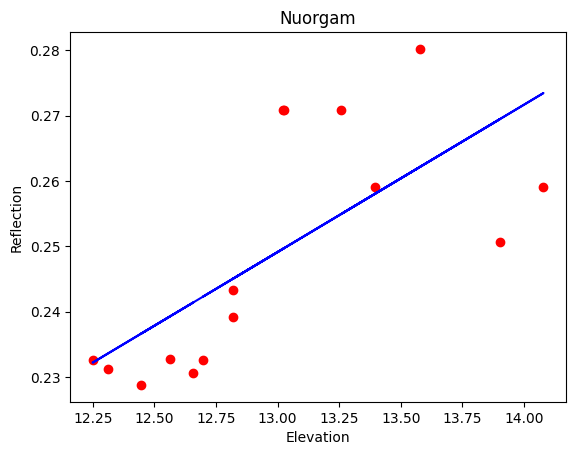

In [24]:
plt.scatter(x, y, color = 'red')
plt.plot(x, model.predict(x), color = 'blue')
plt.title('Nuorgam')
plt.xlabel('Elevation')
plt.ylabel('Reflection')
plt.show()

# Calibration from ASV (N=50) and Lyzenga's model (78)

In [25]:
# import NUORGAM (n) SENTINEL-2 (s2) VALIDATION POINTS (v)
n_c = pd.read_csv('../data/output/satellite-analysis/nuorgam_calibrationpoints_2.csv', delimiter=',')

In [26]:
n_c

,id,SAMPLE_1,SAMPLE_2,SAMPLE_1_2,SAMPLE_2_2,SAMPLE_3,SAMPLE_4,SAMPLE_5,SAMPLE_6,SAMPLE_7,...,SAMPLE_20,SAMPLE_21,SAMPLE_22,SAMPLE_23,SAMPLE_1_3,SAMPLE_2_3,SAMPLE_3_2,SAMPLE_4_2,SAMPLE_5_2,SAMPLE_6_2
0,0,-1.549120,1.549120,0.1322,0.1244,0.1250,0.1197,0.1218,0.1195,0.1220,...,0,0,0,0,11.60,11.72,11.667500,11.667301,4,0.044371
1,1,-2.663183,2.663183,0.1250,0.1239,0.1234,0.1151,0.1144,0.1142,0.1138,...,0,0,0,0,NaN,NaN,NaN,NaN,0,NaN
2,2,-1.480504,1.480504,0.1277,0.1254,0.1270,0.1208,0.1214,0.1147,0.1210,...,0,0,0,0,11.67,13.28,12.053333,12.021470,9,0.655862
3,3,-1.449683,1.449683,0.1277,0.1256,0.1278,0.1192,0.1189,0.1164,0.1167,...,0,0,0,0,11.52,13.26,12.217447,12.537871,47,0.738101
4,4,-2.498674,2.498674,0.1250,0.1246,0.1210,0.1165,0.1144,0.1142,0.1138,...,0,0,0,0,10.05,13.27,10.722000,10.869689,5,1.274322
5,5,-2.087731,2.087731,0.1257,0.1258,0.1210,0.1154,0.1152,0.1131,0.1155,...,0,0,0,0,10.40,10.57,10.508333,10.489830,6,0.061757
6,6,-2.249704,2.249704,0.1257,0.1245,0.1225,0.1152,0.1146,0.1134,0.1149,...,0,0,0,0,10.29,10.44,10.350000,10.332451,8,0.047434
7,8,-2.117731,2.117731,0.1250,0.1247,0.1232,0.1161,0.1158,0.1137,0.1155,...,0,0,0,0,10.62,13.28,10.935455,10.912241,11,0.742996
8,9,-1.853087,1.853087,0.1250,0.1262,0.1238,0.1179,0.1169,0.1149,0.1136,...,0,0,0,0,10.86,13.13,11.070000,11.090064,22,0.456349
9,10,-2.179594,2.179594,0.1257,0.1245,0.1225,0.1152,0.1146,0.1134,0.1149,...,0,0,0,0,10.41,10.53,10.477143,10.473093,7,0.039538


In [27]:
n_c.columns

Index(['id', 'SAMPLE_1', 'SAMPLE_2', 'SAMPLE_1_2', 'SAMPLE_2_2', 'SAMPLE_3',
       'SAMPLE_4', 'SAMPLE_5', 'SAMPLE_6', 'SAMPLE_7', 'SAMPLE_8', 'SAMPLE_9',
       'SAMPLE_10', 'SAMPLE_11', 'SAMPLE_12', 'SAMPLE_13', 'SAMPLE_14',
       'SAMPLE_15', 'SAMPLE_16', 'SAMPLE_17', 'SAMPLE_18', 'SAMPLE_19',
       'SAMPLE_20', 'SAMPLE_21', 'SAMPLE_22', 'SAMPLE_23', 'SAMPLE_1_3',
       'SAMPLE_2_3', 'SAMPLE_3_2', 'SAMPLE_4_2', 'SAMPLE_5_2', 'SAMPLE_6_2'],
      dtype='object')

In [28]:
# drop columns
n_c = n_c.drop(columns=
                           [
                            'SAMPLE_5','SAMPLE_6','SAMPLE_7','SAMPLE_9', 'SAMPLE_10',
                            'SAMPLE_12','SAMPLE_13', 'SAMPLE_14', 'SAMPLE_15',
                            'SAMPLE_16', 'SAMPLE_17','SAMPLE_18', 'SAMPLE_19', 
                            'SAMPLE_20','SAMPLE_21', 'SAMPLE_22','SAMPLE_23','SAMPLE_1_3',
                            'SAMPLE_2_3', 'SAMPLE_3_2','SAMPLE_5_2', 'SAMPLE_6_2'])

In [29]:
n_c

,id,SAMPLE_1,SAMPLE_2,SAMPLE_1_2,SAMPLE_2_2,SAMPLE_3,SAMPLE_4,SAMPLE_8,SAMPLE_11,SAMPLE_4_2
0,0,-1.549120,1.549120,0.1322,0.1244,0.1250,0.1197,0.1176,0.1176,11.667301
1,1,-2.663183,2.663183,0.1250,0.1239,0.1234,0.1151,0.1113,0.1082,NaN
2,2,-1.480504,1.480504,0.1277,0.1254,0.1270,0.1208,0.1172,0.1115,12.021470
3,3,-1.449683,1.449683,0.1277,0.1256,0.1278,0.1192,0.1142,0.1093,12.537871
4,4,-2.498674,2.498674,0.1250,0.1246,0.1210,0.1165,0.1122,0.1082,10.869689
5,5,-2.087731,2.087731,0.1257,0.1258,0.1210,0.1154,0.1116,0.1079,10.489830
6,6,-2.249704,2.249704,0.1257,0.1245,0.1225,0.1152,0.1117,0.1086,10.332451
7,8,-2.117731,2.117731,0.1250,0.1247,0.1232,0.1161,0.1126,0.1075,10.912241
8,9,-1.853087,1.853087,0.1250,0.1262,0.1238,0.1179,0.1123,0.1081,11.090064
9,10,-2.179594,2.179594,0.1257,0.1245,0.1225,0.1152,0.1117,0.1086,10.473093


In [30]:
# rename columns
# Band 2 - Blue
# Band 3 - Green
# Band 4 - Red
# Band 8 - NIR
# Band 11 - SWIR
n_c = n_c.rename(columns={"SAMPLE_2": "ASV", "SAMPLE_2_2": "Band_2", "SAMPLE_3": "Band_3", "SAMPLE_4": "Band_4", "SAMPLE_8": "Band_8", "SAMPLE_11": "Band_11", "SAMPLE_4_2": "ALS"})

In [31]:
n_c

,id,SAMPLE_1,ASV,SAMPLE_1_2,Band_2,Band_3,Band_4,Band_8,Band_11,ALS
0,0,-1.549120,1.549120,0.1322,0.1244,0.1250,0.1197,0.1176,0.1176,11.667301
1,1,-2.663183,2.663183,0.1250,0.1239,0.1234,0.1151,0.1113,0.1082,NaN
2,2,-1.480504,1.480504,0.1277,0.1254,0.1270,0.1208,0.1172,0.1115,12.021470
3,3,-1.449683,1.449683,0.1277,0.1256,0.1278,0.1192,0.1142,0.1093,12.537871
4,4,-2.498674,2.498674,0.1250,0.1246,0.1210,0.1165,0.1122,0.1082,10.869689
5,5,-2.087731,2.087731,0.1257,0.1258,0.1210,0.1154,0.1116,0.1079,10.489830
6,6,-2.249704,2.249704,0.1257,0.1245,0.1225,0.1152,0.1117,0.1086,10.332451
7,8,-2.117731,2.117731,0.1250,0.1247,0.1232,0.1161,0.1126,0.1075,10.912241
8,9,-1.853087,1.853087,0.1250,0.1262,0.1238,0.1179,0.1123,0.1081,11.090064
9,10,-2.179594,2.179594,0.1257,0.1245,0.1225,0.1152,0.1117,0.1086,10.473093


In [32]:
n_c = n_c.dropna()

In [33]:
#print(n_c['SAMPLE_1'].mean())

In [34]:
# coefficient A
x = n_c[['SAMPLE_1']]
y = n_c[['Band_4']]

In [35]:
model.fit(x, y)

r2_score = model.score(x, y)
print(f"R-squared value: {r2_score}")

R-squared value: 0.7275355590226058


In [36]:
print(model.intercept_)

[0.12970097]


In [37]:
# correlation
n_c["SAMPLE_1"].corr(n_c["Band_4"])  

0.8529569502751038

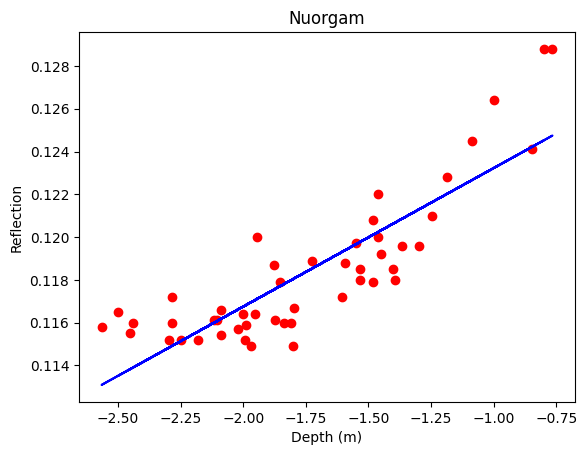

In [38]:
plt.scatter(x, y, color = 'red')
plt.plot(x, model.predict(x), color = 'blue')
plt.title('Nuorgam')
plt.xlabel('Depth (m)')
plt.ylabel('Reflection')
plt.show()

In [39]:
# Coefficient B
x = n_c[['ALS']]
y = n_c[['Band_4']]

In [40]:
model.fit(x, y)

r2_score = model.score(x, y)
print(f"R-squared value: {r2_score}")

R-squared value: 0.3627773663295045


In [41]:
# correlation
n_c["ALS"].corr(n_c["Band_4"])  

0.6023100250946387

In [42]:
intercept = model.intercept_
print(intercept)

[0.08416429]


In [43]:
print(model.coef_)

[[0.00300898]]


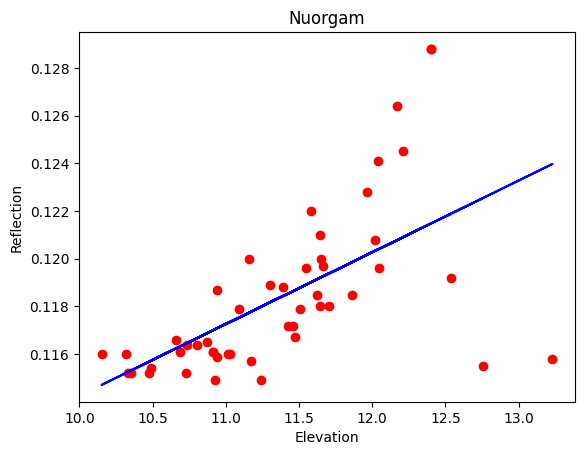

In [44]:
plt.scatter(x, y, color = 'red')
plt.plot(x, model.predict(x), color = 'blue')
plt.title('Nuorgam')
plt.xlabel('Elevation')
plt.ylabel('Reflection')
plt.show()

In [45]:
#power = pow(n_c['Band_3'],0.00300898)

In [46]:
#n_c['l_depth'] = 0.7992727548766502 * power
n_c['l_depth'] = 0.5956807856538455 * ((n_c['Band_3']*100) ** 0.46266215295384416) 

/tmp/ipykernel_1561/2972369268.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n_c['l_depth'] = 0.5956807856538455 * ((n_c['Band_3']*100) ** 0.46266215295384416)


In [47]:
n_c

,id,SAMPLE_1,ASV,SAMPLE_1_2,Band_2,Band_3,Band_4,Band_8,Band_11,ALS,l_depth
0,0,-1.549120,1.549120,0.1322,0.1244,0.1250,0.1197,0.1176,0.1176,11.667301,1.916516
2,2,-1.480504,1.480504,0.1277,0.1254,0.1270,0.1208,0.1172,0.1115,12.021470,1.930642
3,3,-1.449683,1.449683,0.1277,0.1256,0.1278,0.1192,0.1142,0.1093,12.537871,1.936259
4,4,-2.498674,2.498674,0.1250,0.1246,0.1210,0.1165,0.1122,0.1082,10.869689,1.887893
5,5,-2.087731,2.087731,0.1257,0.1258,0.1210,0.1154,0.1116,0.1079,10.489830,1.887893
6,6,-2.249704,2.249704,0.1257,0.1245,0.1225,0.1152,0.1117,0.1086,10.332451,1.898685
7,8,-2.117731,2.117731,0.1250,0.1247,0.1232,0.1161,0.1126,0.1075,10.912241,1.903697
8,9,-1.853087,1.853087,0.1250,0.1262,0.1238,0.1179,0.1123,0.1081,11.090064,1.907981
9,10,-2.179594,2.179594,0.1257,0.1245,0.1225,0.1152,0.1117,0.1086,10.473093,1.898685
10,11,-1.395594,1.395594,0.1253,0.1241,0.1229,0.1180,0.1114,0.1069,11.705676,1.901551


In [19]:
intercept = model.intercept_
intercept = intercept[0]

assert type(intercept) == np.float64, 'should be np.float64'

print(f'Intercept value: {intercept}')

Intercept value: -0.29262977671789253


In [20]:
slope = model.coef_
slope = slope.flatten()[0]

assert type(slope) == np.float64, 'should be np.float64'

print(f'Slope value: {slope.flatten()[0]}')

Slope value: 0.03452886808817488


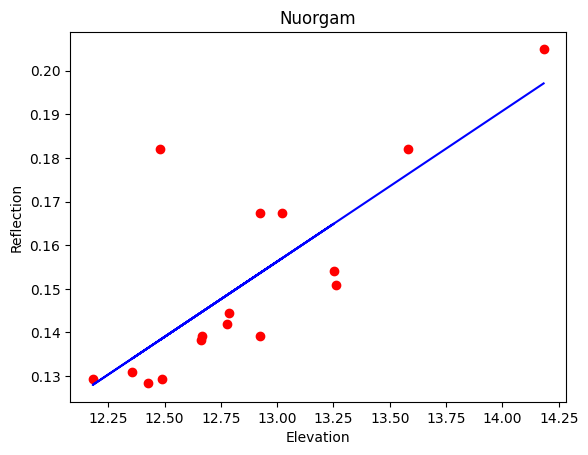

In [21]:
plt.scatter(x, y, color = 'red')
plt.plot(x, model.predict(x), color = 'blue')
plt.title('Nuorgam')
plt.xlabel('Elevation')
plt.ylabel('Reflection')
plt.show()

In [22]:
# calculate depth values for validation points with equation d = a + b * x, in which 
# d = depth
# a = intercept
# b = slope
# x = band reflection value
n_s2_v['depth'] = intercept + slope * n_s2_v['Band_3']

In [23]:
n_s2_v

,PointNo,Northing,Easting,Elevation,Latitude,Longitude,Height,Horizontal,VerticalSt,Band_2,Band_3,Band_4,Band_8,Band_11,depth
0,nuorgamchool2,7775288.560,532940.543,14.183,70.082330,27.866411,36.993443,0.006,0.012,0.1817,0.2050,0.2148,0.3240,0.2559,-0.285551
1,nuorgamchool4,7775294.915,532947.208,13.582,70.082386,27.866589,36.391510,0.005,0.011,0.1574,0.1821,0.1860,0.2576,0.2559,-0.286342
2,nuorgamchool7,7775298.293,532960.619,13.262,70.082415,27.866943,36.070897,0.005,0.011,0.1360,0.1508,0.1399,0.3018,0.2576,-0.287423
3,nuorgamchool9,7775300.432,532954.109,12.787,70.082435,27.866772,35.597051,0.005,0.011,0.1323,0.1444,0.1505,0.1664,0.1572,-0.287644
4,nuorgamchool11,7775300.758,532944.312,12.662,70.082439,27.866515,35.471997,0.005,0.011,0.1294,0.1382,0.1428,0.1513,0.1572,-0.287858
5,nuorgamchool13,7775298.443,532940.226,12.478,70.082419,27.866406,35.288114,0.005,0.011,0.1574,0.1821,0.1860,0.2576,0.2559,-0.286342
6,nuorgamchool14,7775294.444,532937.459,12.923,70.082383,27.866332,35.733090,0.005,0.011,0.1536,0.1673,0.1780,0.2130,0.2220,-0.286853
7,nuorgamchool15,7775294.749,532932.643,13.020,70.082386,27.866206,35.830915,0.005,0.011,0.1536,0.1673,0.1780,0.2130,0.2220,-0.286853
8,nuorgamchool17,7775301.575,532933.338,12.357,70.082448,27.866226,35.167106,0.006,0.012,0.1248,0.1310,0.1340,0.1335,0.1388,-0.288106
9,nuorgamchool19,7775291.658,532925.799,12.924,70.082360,27.866024,35.734533,0.006,0.012,0.1288,0.1392,0.1440,0.1608,0.2220,-0.287823


In [24]:
n_s2_v['s2_elevation'] = 13.395000000000000 + n_s2_v['depth']

In [25]:
n_s2_v

,PointNo,Northing,Easting,Elevation,Latitude,Longitude,Height,Horizontal,VerticalSt,Band_2,Band_3,Band_4,Band_8,Band_11,depth,s2_elevation
0,nuorgamchool2,7775288.560,532940.543,14.183,70.082330,27.866411,36.993443,0.006,0.012,0.1817,0.2050,0.2148,0.3240,0.2559,-0.285551,13.109449
1,nuorgamchool4,7775294.915,532947.208,13.582,70.082386,27.866589,36.391510,0.005,0.011,0.1574,0.1821,0.1860,0.2576,0.2559,-0.286342,13.108658
2,nuorgamchool7,7775298.293,532960.619,13.262,70.082415,27.866943,36.070897,0.005,0.011,0.1360,0.1508,0.1399,0.3018,0.2576,-0.287423,13.107577
3,nuorgamchool9,7775300.432,532954.109,12.787,70.082435,27.866772,35.597051,0.005,0.011,0.1323,0.1444,0.1505,0.1664,0.1572,-0.287644,13.107356
4,nuorgamchool11,7775300.758,532944.312,12.662,70.082439,27.866515,35.471997,0.005,0.011,0.1294,0.1382,0.1428,0.1513,0.1572,-0.287858,13.107142
5,nuorgamchool13,7775298.443,532940.226,12.478,70.082419,27.866406,35.288114,0.005,0.011,0.1574,0.1821,0.1860,0.2576,0.2559,-0.286342,13.108658
6,nuorgamchool14,7775294.444,532937.459,12.923,70.082383,27.866332,35.733090,0.005,0.011,0.1536,0.1673,0.1780,0.2130,0.2220,-0.286853,13.108147
7,nuorgamchool15,7775294.749,532932.643,13.020,70.082386,27.866206,35.830915,0.005,0.011,0.1536,0.1673,0.1780,0.2130,0.2220,-0.286853,13.108147
8,nuorgamchool17,7775301.575,532933.338,12.357,70.082448,27.866226,35.167106,0.006,0.012,0.1248,0.1310,0.1340,0.1335,0.1388,-0.288106,13.106894
9,nuorgamchool19,7775291.658,532925.799,12.924,70.082360,27.866024,35.734533,0.006,0.012,0.1288,0.1392,0.1440,0.1608,0.2220,-0.287823,13.107177


In [26]:
# 
x = n_s2_v[['Elevation']]
y = n_s2_v[['s2_elevation']]

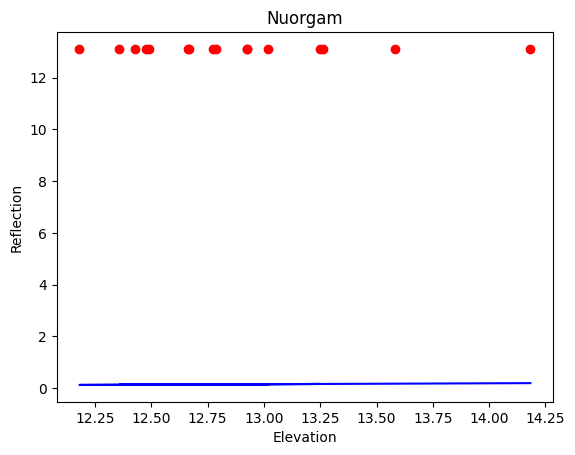

In [27]:
plt.scatter(x, y, color = 'red')
plt.plot(x, model.predict(x), color = 'blue')
plt.title('Nuorgam')
plt.xlabel('Elevation')
plt.ylabel('Reflection')
plt.show()

In [28]:
MSE = mean_squared_error(x, y)
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

0.545526269216884


In [29]:
# import NUORGAM (N) SENTINEL-2 (S2) ASV points, where there is 4% random selection of sample points
ns2_ASV_4 = pd.read_csv('../data/output/satellite-analysis/nuorgam_asv_4percent_points.csv', delimiter=',')

In [30]:
ns2_ASV_4

,532908.375,7775305.37,-1.28,SAMPLE_1,SAMPLE_2,SAMPLE_3,SAMPLE_4,SAMPLE_5,SAMPLE_6,SAMPLE_7,...,SAMPLE_14,SAMPLE_15,SAMPLE_16,SAMPLE_17,SAMPLE_18,SAMPLE_19,SAMPLE_20,SAMPLE_21,SAMPLE_22,SAMPLE_23
0,532908.375,7775308.875,-1.38,0.1222,0.1200,0.1264,0.1249,0.1217,0.1163,0.1171,...,0.115,0.0006,0.0026,0.0027,0.0022,0,0,0,0,0
1,532908.375,7775309.625,-1.36,0.1222,0.1200,0.1264,0.1249,0.1217,0.1163,0.1171,...,0.115,0.0006,0.0026,0.0027,0.0022,0,0,0,0,0
2,532908.375,7775314.125,-1.32,0.1222,0.1220,0.1245,0.1214,0.1217,0.1163,0.1171,...,0.115,0.0006,0.0021,0.0024,0.0023,0,0,0,0,0
3,532908.375,7775316.375,-1.41,0.1222,0.1220,0.1245,0.1214,0.1217,0.1163,0.1171,...,0.115,0.0006,0.0021,0.0024,0.0023,0,0,0,0,0
4,532908.625,7775309.375,-1.36,0.1222,0.1200,0.1264,0.1249,0.1217,0.1163,0.1171,...,0.115,0.0006,0.0026,0.0027,0.0022,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7934,532908.125,7775393.625,-1.80,0.1188,0.1172,0.1219,0.1164,0.1152,0.1143,0.1165,...,0.115,0.0006,0.0018,0.0024,0.0017,0,0,0,0,0
7935,532908.125,7775395.375,-1.79,0.1188,0.1172,0.1219,0.1164,0.1152,0.1143,0.1165,...,0.115,0.0006,0.0018,0.0024,0.0017,0,0,0,0,0
7936,532908.125,7775398.625,-1.94,0.1188,0.1172,0.1219,0.1164,0.1152,0.1143,0.1165,...,0.115,0.0006,0.0018,0.0024,0.0017,0,0,0,0,0
7937,532908.125,7775405.125,-1.88,0.1192,0.1180,0.1231,0.1187,0.1163,0.1153,0.1157,...,0.115,0.0006,0.0019,0.0024,0.0020,0,0,0,0,0


In [31]:
# drop columns
ns2_ASV_4 = ns2_ASV_4.drop(columns=
                           ['SAMPLE_1',
                            'SAMPLE_5','SAMPLE_6','SAMPLE_7','SAMPLE_9', 'SAMPLE_10',
                            'SAMPLE_12','SAMPLE_13', 'SAMPLE_14', 'SAMPLE_15',
                            'SAMPLE_16', 'SAMPLE_17','SAMPLE_18', 'SAMPLE_19', 
                            'SAMPLE_20','SAMPLE_21', 'SAMPLE_22','SAMPLE_23'])

In [32]:
ns2_ASV_4

,532908.375,7775305.37,-1.28,SAMPLE_2,SAMPLE_3,SAMPLE_4,SAMPLE_8,SAMPLE_11
0,532908.375,7775308.875,-1.38,0.1200,0.1264,0.1249,0.1250,0.1188
1,532908.375,7775309.625,-1.36,0.1200,0.1264,0.1249,0.1250,0.1188
2,532908.375,7775314.125,-1.32,0.1220,0.1245,0.1214,0.1214,0.1188
3,532908.375,7775316.375,-1.41,0.1220,0.1245,0.1214,0.1214,0.1188
4,532908.625,7775309.375,-1.36,0.1200,0.1264,0.1249,0.1250,0.1188
...,...,...,...,...,...,...,...,...
7934,532908.125,7775393.625,-1.80,0.1172,0.1219,0.1164,0.1152,0.1116
7935,532908.125,7775395.375,-1.79,0.1172,0.1219,0.1164,0.1152,0.1116
7936,532908.125,7775398.625,-1.94,0.1172,0.1219,0.1164,0.1152,0.1116
7937,532908.125,7775405.125,-1.88,0.1180,0.1231,0.1187,0.1157,0.1112


In [33]:
# set shoreline elevation
ns2_ASV_4['PointLocation_Elevation'] = 13.395000000000000

In [34]:
# rename columns
# Band 2 - Blue
# Band 3 - Green
# Band 4 - Red
# Band 8 - NIR
# Band 11 - SWIR
ns2_ASV_4 = ns2_ASV_4.rename(columns={"-1.28": "Depth", "SAMPLE_2": "Band_2", "SAMPLE_3": "Band_3", "SAMPLE_4": "Band_4", "SAMPLE_8": "Band_8", "SAMPLE_11": "Band_11"})

In [35]:
ns2_ASV_4['ASV_Elevation'] = ns2_ASV_4['PointLocation_Elevation'] + ns2_ASV_4["Depth"]

In [36]:
ns2_ASV_4

,532908.375,7775305.37,Depth,Band_2,Band_3,Band_4,Band_8,Band_11,PointLocation_Elevation,ASV_Elevation
0,532908.375,7775308.875,-1.38,0.1200,0.1264,0.1249,0.1250,0.1188,13.395,12.015
1,532908.375,7775309.625,-1.36,0.1200,0.1264,0.1249,0.1250,0.1188,13.395,12.035
2,532908.375,7775314.125,-1.32,0.1220,0.1245,0.1214,0.1214,0.1188,13.395,12.075
3,532908.375,7775316.375,-1.41,0.1220,0.1245,0.1214,0.1214,0.1188,13.395,11.985
4,532908.625,7775309.375,-1.36,0.1200,0.1264,0.1249,0.1250,0.1188,13.395,12.035
...,...,...,...,...,...,...,...,...,...,...
7934,532908.125,7775393.625,-1.80,0.1172,0.1219,0.1164,0.1152,0.1116,13.395,11.595
7935,532908.125,7775395.375,-1.79,0.1172,0.1219,0.1164,0.1152,0.1116,13.395,11.605
7936,532908.125,7775398.625,-1.94,0.1172,0.1219,0.1164,0.1152,0.1116,13.395,11.455
7937,532908.125,7775405.125,-1.88,0.1180,0.1231,0.1187,0.1157,0.1112,13.395,11.515


In [37]:
ns2_ASV_4['depth_plus'] = ns2_ASV_4['Depth'].abs()

In [38]:
ns2_ASV_4

,532908.375,7775305.37,Depth,Band_2,Band_3,Band_4,Band_8,Band_11,PointLocation_Elevation,ASV_Elevation,depth_plus
0,532908.375,7775308.875,-1.38,0.1200,0.1264,0.1249,0.1250,0.1188,13.395,12.015,1.38
1,532908.375,7775309.625,-1.36,0.1200,0.1264,0.1249,0.1250,0.1188,13.395,12.035,1.36
2,532908.375,7775314.125,-1.32,0.1220,0.1245,0.1214,0.1214,0.1188,13.395,12.075,1.32
3,532908.375,7775316.375,-1.41,0.1220,0.1245,0.1214,0.1214,0.1188,13.395,11.985,1.41
4,532908.625,7775309.375,-1.36,0.1200,0.1264,0.1249,0.1250,0.1188,13.395,12.035,1.36
...,...,...,...,...,...,...,...,...,...,...,...
7934,532908.125,7775393.625,-1.80,0.1172,0.1219,0.1164,0.1152,0.1116,13.395,11.595,1.80
7935,532908.125,7775395.375,-1.79,0.1172,0.1219,0.1164,0.1152,0.1116,13.395,11.605,1.79
7936,532908.125,7775398.625,-1.94,0.1172,0.1219,0.1164,0.1152,0.1116,13.395,11.455,1.94
7937,532908.125,7775405.125,-1.88,0.1180,0.1231,0.1187,0.1157,0.1112,13.395,11.515,1.88


In [39]:
# 
x = ns2_ASV_4[['depth_plus']]
y = ns2_ASV_4[['Band_3']]

In [40]:
model.fit(x, y)

r2_score = model.score(x, y)
print(f"R-squared value: {r2_score}")

R-squared value: 0.6300227833488519


In [41]:
intercept = model.intercept_
intercept = intercept[0]

assert type(intercept) == np.float64, 'should be np.float64'

print(f'Intercept value: {intercept}')

Intercept value: 0.13243967188385417


In [42]:
slope = model.coef_
slope = slope.flatten()[0]

assert type(slope) == np.float64, 'should be np.float64'

print(f'Slope value: {slope.flatten()[0]}')

Slope value: -0.004849809019448405


In [43]:
# calculate depth values for validation points with equation d = a + b * x, in which 
# d = depth
# a = intercept
# b = slope
# x = band reflection value
ns2_ASV_4['LR_depth'] = intercept + slope * ns2_ASV_4['Band_3']

In [44]:
ns2_ASV_4['s2_elevation'] = 13.395000000000000 + ns2_ASV_4['LR_depth']

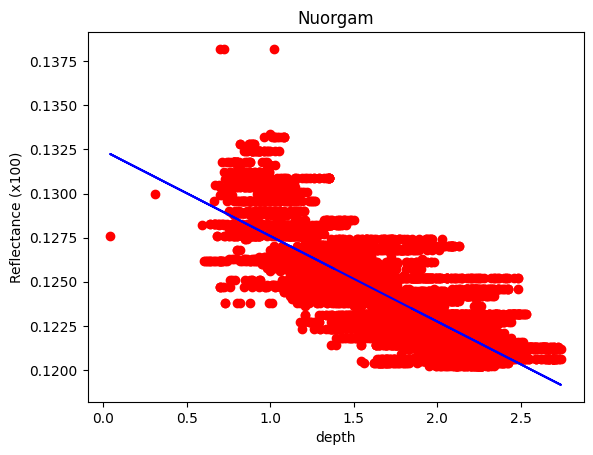

In [45]:
plt.scatter(x, y, color = 'red')
plt.plot(x, model.predict(x), color = 'blue')
plt.title('Nuorgam')
plt.xlabel('depth')
plt.ylabel('Reflectance (x100)')
plt.show()

In [46]:
MSE = mean_squared_error(x, y)
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

1.6312192063899926
